# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Given that the goal entails making predictions about future events based on historical data, machine learning (ML) is a suitable solution for this situation. Machine learning (ML) is the definition of a computer's capacity to learn and make decisions without explicit programming. It functions according to the principles of Task, Experience, and Performance, whereby an algorithm is trained on a particular task using a dataset (Experience), and its performance is assessed, frequently using metrics such as a confusion matrix. Since there are so many variables to consider, including flight schedules, airline schedules, and weather conditions, traditional approaches like rule-based systems can easily become excessively complex.ML algorithms, on the other hand, have the ability to effectively learn from past patterns and produce more precise forecasts, improving the customer experience by informing customers of potential delays caused by severe weather. Moreover, machine learning models are accurate and efficient when handling large amounts of data since they are scalable.

### 2. Formulate the business problem, success metrics, and desired ML output.

### Business Problem: 
When customers book flights to or from the busiest airports in the United States, the company wants to enhance their experience by informing them of the possibility of weather-related flight delays.

### Success metrics: 
- A decrease in client complaints about unanticipated delays caused by inclement weather.
- Within the first year following the feature's implementation, there must be a minimum 10% increase in customer satisfaction and retention rates.

### Desired ML Output: 
The likelihood that a flight will be delayed by bad weather should be produced by the machine learning model. This could take the form of a multi-class classification with different delay severity levels, or a binary classification ("Delayed" or "Not Delayed") combined with a confidence score.

### 3. Identify the type of ML problem you’re dealing with.

In essence, the machine learning task at hand is a supervised learning task—more precisely, a classification problem. The outcome variable (or "label") in our labelled historical data is whether or not a flight was delayed by severe weather. For the model to be able to forecast the future, it must learn from this data. Algorithms that can carry out probabilistic classification would be appropriate given the requirement to output a probability or a confidence score.

If the temporal features of aircraft delays are taken into account, you could also make the case for framing this as a time-series prediction problem. Time-series data processing models would be more suitable in this situation.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [2]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data_compressed/data_compressed' 
base_path = '.'  
csv_base_path = 'extracted_files'  

!mkdir -p {csv_base_path}

In [3]:
# How many zip files do we have? write a code to answer it.

all_files = os.listdir(zip_path)
zip_files = [f for f in all_files if f.endswith('.zip')]
zip_count = len(zip_files)
print(f"Number of ZIP files: {zip_count}")

Number of ZIP files: 60


#### Extract CSV files from ZIP files

In [4]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """
    full_zip_path = os.path.join(zip_path, zipFile_name)
    try:
        with ZipFile(full_zip_path, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except Exception as e:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip 
Extracting On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_9.zip 
Extracting On

In [5]:
# How many csv files have we extracted? write a code to answer it.

all_extracted_files = os.listdir(csv_base_path)
csv_count = sum(1 for file in all_extracted_files if file.endswith('.csv'))
print(f"Number of extracted CSV files: {csv_count}")

Number of extracted CSV files: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [6]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [7]:
csv_file_name = 'On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv'
csv_full_path = os.path.join(csv_base_path, csv_file_name)
df_temp = pd.read_csv(csv_full_path)
print(df_temp.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID D

**Question**: Print the row and column length in the dataset, and print the column names.

In [8]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [9]:
print(df_temp.head(10))

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [10]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [11]:
delay_columns = [col for col in df_temp.columns if 'Del' in col]
print("Columns containing the word 'Del':")
print(delay_columns)

Columns containing the word 'Del':
['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [12]:
# Number of rows and columns
print("The #rows and #columns are ", df_temp.shape[0], " and ", df_temp.shape[1])

# Unique years in the dataset
unique_years = df_temp['Year'].unique()  
print("The years in this dataset are: ", unique_years)

# Unique months in the dataset
unique_months = df_temp['Month'].unique() 
print("The months covered in this dataset are: ", unique_months)

# Date range
date_range_min = df_temp['FlightDate'].min() 
date_range_max = df_temp['FlightDate'].max()
print("The date range for data is :", date_range_min, " to ", date_range_max)

# Airlines
unique_airlines = df_temp['Reporting_Airline'].unique()
print("The airlines covered in this dataset are: ", list(unique_airlines))

# Origin Airports
unique_origin_airports = df_temp['Origin'].unique()  
print("The Origin airports covered are: ", list(unique_origin_airports))

# Destination Airports
unique_dest_airports = df_temp['Dest'].unique() 
print("The Destination airports covered are: ", list(unique_dest_airports))


The #rows and #columns are  585749  and  110
The years in this dataset are:  [2018]
The months covered in this dataset are:  [9]
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [13]:
# Origin and Destination Airport Counts
origin_counts = df_temp['Origin'].value_counts()
destination_counts = df_temp['Dest'].value_counts()
counts = pd.DataFrame({'Origin': origin_counts, 'Destination': destination_counts})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
ACK     129          129
ACT     135          135
ACV     122          122
ACY     242          242
ADK       9            9
ADQ      51           51
AEX     278          279
AGS     394          394
ALB     904          904
ALO      55           55
AMA     465          466
ANC    1562         1559
APN      51           51
ASE     373          371
ATL   31525        31521
ATW     294          294
AUS    5224         5224
AVL     678          678
AVP     305          305
AZA     315          315
AZO     258          258
BDL    2232         2232
BET      68           68
BFF      50           50
BFL     193          193
..      ...          ...
STS     144          144
STT     193          193
STX      60           60
SUN      87           85
SUX     110          110
SWF     149          149
SWO      73           73
SYR    1135         1135
TLH     529          529
TOL     134          134
TPA    5278         5278
TRI     175          175
TTN     240          240
TUL    1386         1386
TUS    1352         1354
TVC     416          416
TWF      85           85
TXK     106          106
TYR     129          129
TYS    1269         1269
UIN      75           75
USA      58           58
VEL      50           50
VLD      84           84
VPS     662          662
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [14]:
# Sort and display the top 15 Origin airports
top_15_origin = counts.sort_values(by='Origin', ascending=False).head(15)
print("Top 15 Origin Airports:")
print(top_15_origin['Origin'])

# Sort and display the top 15 Destination airports
top_15_destination = counts.sort_values(by='Destination', ascending=False).head(15)
print("\nTop 15 Destination Airports:")
print(top_15_destination['Destination'])

Top 15 Origin Airports:
ATL    31525
ORD    28257
DFW    22802
DEN    19807
CLT    19655
LAX    17875
SFO    14332
IAH    14210
LGA    13850
MSP    13349
LAS    13318
PHX    13126
DTW    12725
BOS    12223
SEA    11872
Name: Origin, dtype: int64

Top 15 Destination Airports:
ATL    31521
ORD    28250
DFW    22795
DEN    19807
CLT    19654
LAX    17873
SFO    14348
IAH    14203
LGA    13850
MSP    13347
LAS    13322
PHX    13128
DTW    12724
BOS    12227
SEA    11877
Name: Destination, dtype: int64


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

It is possible to forecast whether or not a flight would be delayed given all the available information, although the precision of this forecast would depend on a number of variables, such as the calibre of the data and the model selected.In addition to the elements found in the dataset, such as airline, distance, and arrival and departure times, the other variables may also include external factors like the weather, which can call for the use of additional data sources.


Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [15]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    df_combined = pd.DataFrame()
    
    for csv_file in csv_files:
        df = pd.read_csv(csv_file, usecols=filter_cols)
        condition = True
        for col, val in zip(subset_cols, subset_vals):
            condition &= df[col].isin(val)
        
        df = df[condition]
        df_combined = pd.concat([df_combined, df], ignore_index=True)
    
    # Save the combined DataFrame to a CSV file
    df_combined.to_csv(file_name, index=False)
    return df_combined 

In [16]:
csv_files = [f"{csv_base_path}/{file}" for file in os.listdir(csv_base_path) if file.endswith('.csv')]  

filter_cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [17]:
# Merge the csv files
start = time.time()
combined_csv_filename = f"{base_path}/combined_files.csv"
combine_csv(csv_files, filter_cols, subset_cols, subset_vals, combined_csv_filename)
print(f"CSVs merged in {round((time.time() - start) / 60, 2)} minutes")

CSVs merged in 1.54 minutes


#### Load dataset

Load the combined dataset.

In [18]:
data = pd.read_csv("combined_files.csv")

Print the first 5 records.

In [19]:
print(data.head())

   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  ArrDelay  ArrDelayMinutes  \
0    ATL          GA  IAH        TX        2145     -20.0              0.0   
1    DFW          TX  ATL        GA         945      -3.0              0.0   
2    ATL          GA  DEN        CO        1855      -7.0              0.0   
3    ATL          GA  PHX        AZ        1634      -4.0              0.0   
4    PHX          AZ  ATL        GA         700     -13.0              0.0   

   ArrDel15  Cancelled  Diverted  AirTime  Distanc

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [20]:
print("The #rows and #columns are ", data.shape[0], " and ", data.shape[1])
print("The years in this dataset are: ", list(data['Year'].unique()))
print("The months covered in this dataset are: ", sorted(list(data['Month'].unique())))
print("The date range for data is :", min(data['FlightDate']), " to ", max(data['FlightDate']))
print("The airlines covered in this dataset are: ", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are: ", list(data['Origin'].unique()))
print("The Destination airports covered are: ", list(data['Dest'].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2014, 2015, 2016, 2017, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']
The Destination airports covered are:  ['IAH', 'ATL', 'DEN', 'PHX', 'CLT', 'LAX', 'DFW', 'SFO', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [21]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [22]:
null_count = data.isnull().sum(axis=0)
print(null_count)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
Cancelled                0
Diverted                 0
AirTime              22540
Distance                 0
DistanceGroup            0
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [23]:
data.dropna(subset=['ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime'], inplace=True)

Get the hour of the day in 24-hour time format from CRSDepTime.

In [24]:
data['DepHourofDay'] = (data['CRSDepTime'] // 100).astype(int)

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

Predicting whether weather will cause a flight to be delayed by more than fifteen minutes is a binary classification issue in machine learning. In order to provide clients with information throughout the booking process, the algorithm should be able to assess historical data and generate a chance of delay.

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

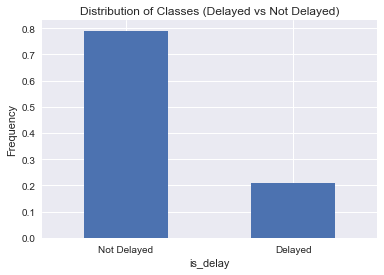

In [25]:
delay_frequency = (data.groupby('is_delay').size() / len(data))
delay_frequency.plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of Classes (Delayed vs Not Delayed)')
plt.xticks(ticks=[0,1], labels=['Not Delayed', 'Delayed'], rotation=0)
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

The dataset's class distribution (Delayed vs. Not Delayed) is depicted in a bar plot. There is a clear class imbalance in the data, as seen by the graphic. When compared to the number of instances when flights are delayed, the number of times where flights are not delayed is noticeably higher. This imbalance suggests that there are few delayed flight cases in the dataset, which could affect how well a machine learning model trained on this data performs because the model may be biased toward predicting the "Not Delayed" class. To create a more reliable and accurate predictive model, it may be necessary to rectify this class imbalance using methods like resampling, applying class weights during model training, or utilizing alternative assessment metrics.

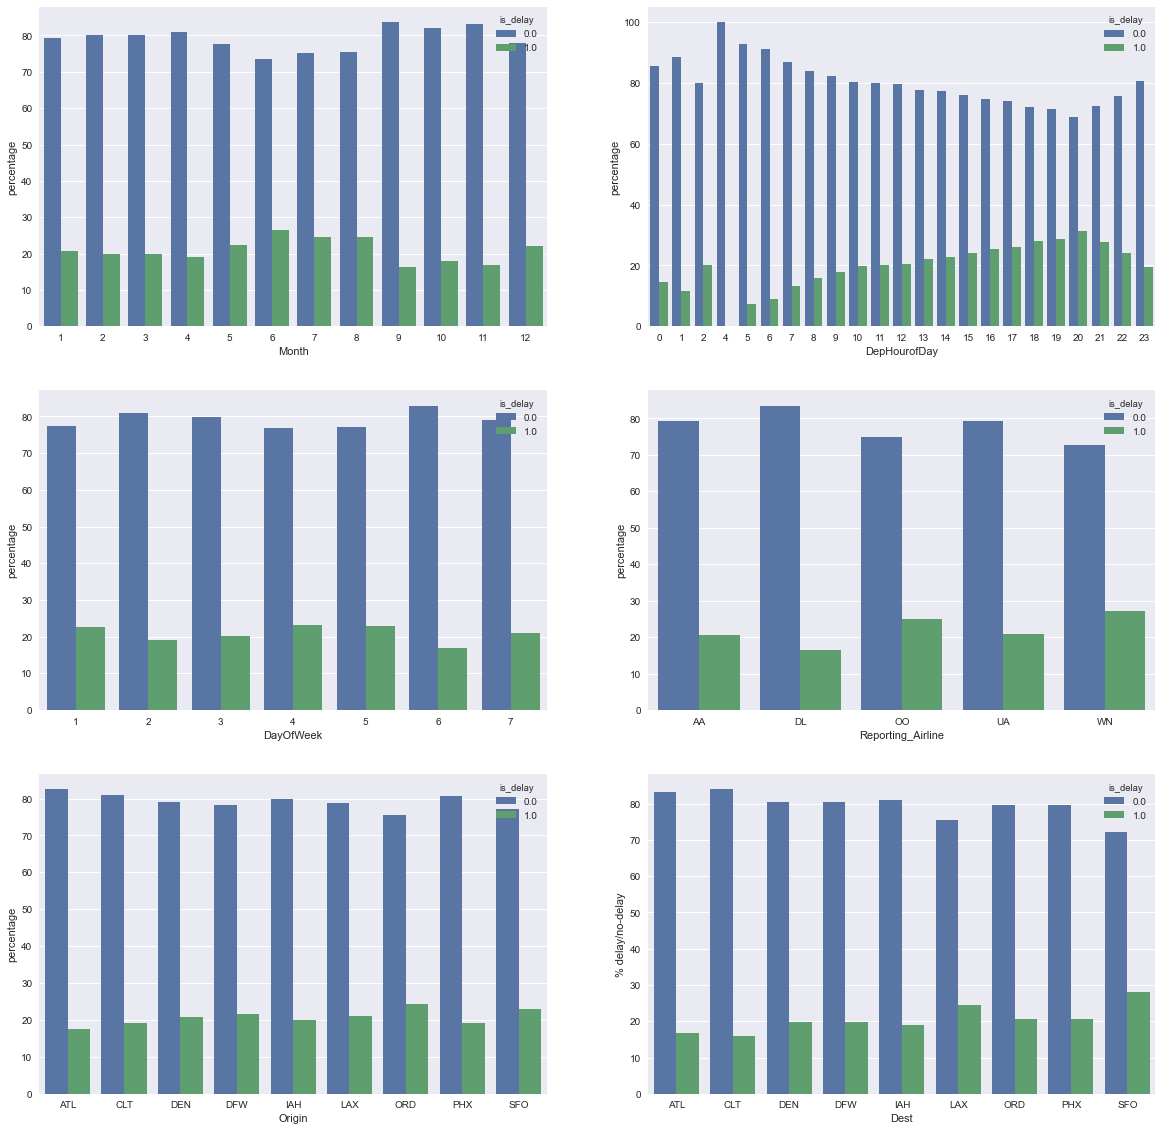

In [26]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    
plt.show()

In [27]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

### Answers to the questions above
1. From the first plot (top-left) that shows delays by `Month`: June (Month 6) have the highest percentage of delays followed by July and August (Months 7 and 8) appear to have the second highest percentage of delays.
2. Referring to the plot for `DepHourofDay` (top-right): Delays tend to increase later in the day, peaking during the hours of 18 to 20 (6 PM to 8 PM).
3. Observing the `DayOfWeek` plot (middle-left): Thursday (Day 4) has the highest percentage of delays, followed closely by Friday (Day 5) and Monday (Day 1).
4. Looking at the `Reporting_Airline plot` (middle-right): The airline represented by 'WN' has the highest percentage of delays, followed by 'OO'.
5. - For `Origin` airports (bottom-left): The airport represented by 'ORD' seems to have the highest percentage of delays.
   - For `Dest` airports (bottom-right): 'SFO' appears to lead in terms of delay percentage.
6. There doesn't appear to be much of a relationship between flight distance and delays based on the plot. There are delays on flights of different lengths, but the data that is available does not appear to indicate that longer flights are more likely to experience delays.

### Features

Look at all the columns and what their specific types are.

In [28]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay'],
      dtype='object')

In [29]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
Cancelled            float64
Diverted             float64
AirTime              float64
Distance             float64
DistanceGroup          int64
DepHourofDay           int32
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [30]:
data_orig = data.copy()
data = data[['is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
             'Reporting_Airline', 'Origin', 'Dest', 'Distance']]

categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
                        'Reporting_Airline', 'Origin', 'Dest']

for c in categorical_columns:
    data[c] = data[c].astype('category')

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [31]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [32]:
print("Length of the dataset:", len(data))

Length of the dataset: 1635590


In [33]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Or

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [34]:
data.rename(columns = {'is_delay': 'target'}, inplace=True)

In [35]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
data.to_csv('combined_csv_v1.csv', index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [65]:
data = pd.read_csv('combined_csv_v1.csv')

In [66]:
# Splitting the data into 80% training data and 20% test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### Baseline classification model

In [67]:
# Create a logistic model

X_train = train_data.drop("target", axis=1)
train_labels = train_data["target"]
X_test = test_data.drop("target", axis=1)
test_labels = test_data["target"]


model = LogisticRegression(max_iter=100000)

# Train the model with the scaled training data
model.fit(X_train, y_train)

target_predicted = model.predict(X_test)

target_predicted_train = model.predict(X_train)

target_probs = model.predict_proba(X_test)[:, 1]

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [68]:
# Write function to plot confusion matrix
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') 
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Delayed', 'Delayed'])
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Delayed', 'Delayed'], rotation=0)
    

In [69]:
#  Write function to plot ROC curve
def plot_roc(test_labels, target_probs):
    fpr, tpr, thresholds = roc_curve(test_labels, target_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

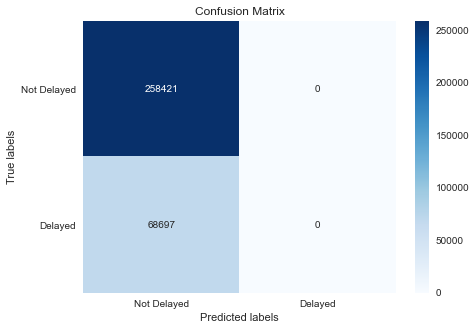

In [70]:
plot_confusion_matrix(test_labels, target_predicted)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

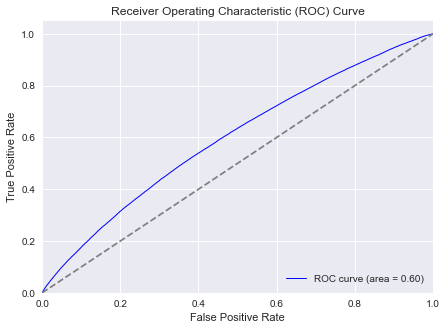

In [71]:
plot_roc(test_labels, target_probs)

In [72]:
def calculate_metrics(true_labels, predicted_labels, label="Test"):
    
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    specificity = tn / (tn + fp)
    
    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")

In [73]:
calculate_metrics(test_labels, target_predicted, "Test" )

Accuracy: 0.7900
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000


In [74]:
calculate_metrics(train_labels, target_predicted_train, "Training")

Accuracy: 0.7901
Precision: 0.0000
Recall: 0.0000
Specificity: 1.0000


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.

1. The model performs the same on the training and test sets in terms of accuracy, precision, recall, and specificity. The fact that the model cannot accurately categorize the positive class (delayed flights) suggests that it is consistent but highly biased.
2. Although the model's high accuracy of 0.7901 is deceiving, both the precision and the recall of the model are 0. This suggests that the model is not detecting any real positives (delayed flights); rather, it is only forecasting the negative class (not delayed). With a recall of 0, it failed to identify any genuine positives, but with a specificity of 1, it properly identified all true negatives. An unbalanced dataset could lead to a model that favors the majority class.
3. The model is not yet practical from a business perspective. Recall may be the most important statistic in this situation because customer happiness is more dependent on spotting actual delays. With zero recall, the model requires refinement.To remedy the class imbalance, we need to think about experimenting with other resampling methods in the future iteration, such as oversampling the minority class or undersampling the majority class.To develop a model that can enhance recall and more accurately and precisely capture the underlying patterns without compromising accuracy or precision, we may need to experiment with various methods and hyperparameters. we also need to do feature engineering to aid in the model's improvement. Adding new features, picking the ones that will have the biggest effects, and scaling or encoding them accordingly will help.


**Question**: What can you summarize from the confusion matrix?


The confusion matrix shows that there is a serious problem with the model's ability to recognize delayed planes. It has successfully found 258,421 cases (True Negatives) in which flights were not delayed, but it has not successfully discovered any cases (True Positives) in which flights were delayed. Rather, it made the mistake of predicting that 68,967 planes would not be delayed when in fact they were (False Negatives). This suggests that the model has a bias towards forecasting the 'Not Delayed' class, which reduces its practical usefulness because it cannot adequately alert clients to probable delays. The class disparity or other elements, such the model or feature selection, may be at blame for this bias. 

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


https://gitlab.com/dsts3/airplane-delay-prediction/

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [75]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

## Add indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays) 

Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [77]:
weather = pd.read_csv('daily-summaries-2023-10-30T18-36-10.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

## Map weather stations to airport code
station_map = dict(zip(station, airports))

# Create a new 'airport' column in the weather DataFrame
weather['airport'] = weather['STATION'].map(station_map)

Create another column called `MONTH` from the `DATE` column.

In [78]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [79]:
weather['SNOW'].fillna(0, inplace=True)
weather['SNWD'].fillna(0, inplace=True)

# Checking for missing values in all columns
missing_values = weather.isna().sum()
print(missing_values)

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64


**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [80]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather.index[weather['TAVG'].isna()].tolist()
TMAX_idx = weather.index[weather['TMAX'].isna()].tolist()
TMIN_idx = weather.index[weather['TMIN'].isna()].tolist()

# Printing the index of rows with missing values in the 'TAVG' column
print("Index for rows with missing TAVG values:", TAVG_idx)

Index for rows with missing TAVG values: [3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 13420]


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [81]:
weather_impute = weather.groupby(['MONTH', 'STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

MONTH      STATION       TAVG        TMAX       TMIN
0    01  USW00003017  -2.741935   74.000000 -69.858065
1    01  USW00003927  79.529032  143.767742  20.696774

Merge the mean data with the weather data.

In [82]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [83]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [84]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)
weather.isna().sum()

DATE       0
AWND       0
PRCP       0
SNOW       0
TAVG       0
airport    0
dtype: int64

Add the origin and destination weather conditions to the dataset.

In [85]:
## Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

## Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [86]:
sum(data.isna().any())

0

In [87]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'Cancelled',
       'Diverted', 'AirTime', 'Distance', 'DistanceGroup', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [88]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [89]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis=1)
data.drop(categorical_columns, axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [90]:
columns_list = data.columns.tolist()
print(columns_list)

['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3', 'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA', 

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [91]:
data.rename(columns = {'is_delay':'target'}, inplace=True )# Enter your code here

In [92]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data.to_csv('combined_csv_v2.csv', index=False)

Create the training and testing sets again.

In [464]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [93]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your updated DataFrame
X = data.drop(columns=['target'])  # assuming 'target' is the name of your target column
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [99]:
# Creating a new logistic regression model
new_model = LogisticRegression(max_iter=500)
new_model.fit(X_train, y_train)

y_pred = new_model.predict(X_test)
y_pred_train = new_model.predict(X_train)
target_probs = new_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258421
         1.0       0.55      0.06      0.10     68697

    accuracy                           0.79    327118
   macro avg       0.68      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118

[[255214   3207]
 [ 64739   3958]]


### New baseline classifier

Now, see if these new features add any predictive power to the model.

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

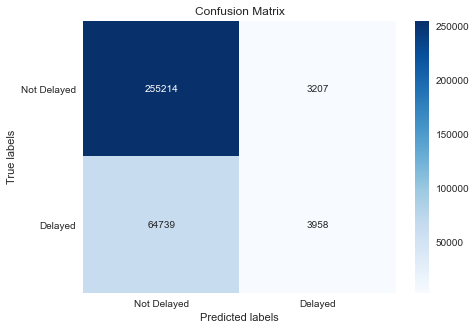

In [100]:
# Create confusion matrix
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  # fmt='d' displays integer values in each cell
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.xticks(ticks=[0.5, 1.5], labels=['Not Delayed', 'Delayed'])  # Improve x-axis labels
    plt.yticks(ticks=[0.5, 1.5], labels=['Not Delayed', 'Delayed'], rotation=0)  # Improve y-axis labels
plot_confusion_matrix(y_test, y_pred)

In [101]:
# Plot ROC curve
def plot_roc(y_test, target_probs):
    fpr, tpr, thresholds = roc_curve(y_test, target_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, color='blue', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
plot_roc(y_test, target_probs)

In [103]:
def calculate_metrics(true_labels, predicted_labels, label="Test"):
    # Calculate Accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    
    # Calculate Precision
    precision = precision_score(true_labels, predicted_labels)
    
    # Calculate Recall
    recall = recall_score(true_labels, predicted_labels)
    
    # Calculate Specificity
    tn, fp, fn, tp = confusion_matrix(true_labels, predicted_labels).ravel()
    specificity = tn / (tn + fp)
    
    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    
calculate_metrics(y_test, y_pred, "Test" )
calculate_metrics(y_train, y_pred_train, "Training")

Accuracy: 0.7923
Precision: 0.5524
Recall: 0.0576
Specificity: 0.9876
Accuracy: 0.7925
Precision: 0.5534
Recall: 0.0593
Specificity: 0.9873


Question: did you notice a difference by adding the extra data on the results?

The ROC curve and the confusion matrix indicate that, indeed, the model's performance appears to have changed with the addition of more data.
- ROC Curve: With a ROC curve area of 0.67, the model's performance is deemed reasonable. This is a helpful metric to comprehend how well the model can differentiate between the two classes (Delayed and Not Delayed) at various threshold settings.
- Confusion Matrix: This model has been able to accurately identify some delayed flights in comparison to the previous one (True Positives: 3958). Still, a lot of false negatives (64739) exist, which suggests that there is still space for improvement.
- Accuracy, Precision, Recall, and Specificity: The precision and accuracy have slightly improved. As a result of improved precision, more flights than ever before were actually delayed out of all those that the algorithm had predicted would be delayed. Since the recall is still low, a sizable portion of actual delays are being missed by the model. It has, however, somewhat improved, which is encouraging.
By including additional variables like holidays and weather, the model's precision and recall have improved and it has been able to identify some of the delayed planes that it had previously missed. Still, there's a lot of space for development, particularly when it comes to boosting recall to record more real delays. This could be accomplished by experimenting with other models, fine-tuning the model's hyperparameters, or doing more feature engineering.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the problem statement.

https://public.tableau.com/app/profile/elizabeth.mathachan/viz/EDA-PART2/Airplanedelayprediction?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. With more features, the model performs better, but it might not yet reach the business objective entirely. Even with the improvement, the recall remains low, indicating that a sizable portion of actual delays are missed by the model. If I had more time, I would look into other feature engineering options, such as including features that are connected to historical delay patterns or peak travel hours. Experimenting with various models, such as Random Forests or Gradient Boosting, and optimizing hyperparameters may prove advantageous.
2. Holiday information and more weather-related features made a slight improvement to the model. Missing value management and one-hot encoding for categorical variables were crucial techniques. A more comprehensive understanding of model performance and the identification of areas for improvement were made possible by the application of several evaluation measures, such as the ROC curve and confusion matrix.
3. The model was previously biased towards the 'Not Delayed' class, making it difficult to handle class imbalance. To increase the model's performance, selecting the appropriate features and creating new ones was also essential and difficult.
4. The main lessons that I have learnt were:
    - how crucial it is to comprehend and fully preprocess the data. The performance of the model can be greatly impacted by effective feature engineering.
    - the importance of adjusting hyperparameters and iterating through multiple models to see which one is optimal.
    - the need to use a variety of assessment measures in order to obtain a thorough understanding of the model's performance and make sure it achieves business goals.